# Logistic Regression

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [34]:
df = pd.read_csv("C:/Users/moham/Desktop/Data Mining and ML/data cleannnn.csv")


if 'Total Cup Points/60' in df.columns:
    # Calculate the 33rd and 66th percentiles for 'Total Cup Points'
    low_threshold = df['Total Cup Points/60'].quantile(0.33)
    high_threshold = df['Total Cup Points/60'].quantile(0.66)

    # Define the quality categories based on percentiles
    def categorize_quality(score):
        if score <= low_threshold:
            return 'Low Quality'
        elif score <= high_threshold:
            return 'Moderate Quality'
        else:
            return 'High Quality'

    # Apply the categorization function to create a new column
    df['Quality Category'] = df['Total Cup Points/60'].apply(categorize_quality)

    # Display the distribution of the new categories
    print(df['Quality Category'].value_counts())
else:
    print("Column 'Total Cup Points' not found in the dataframe.")

Low Quality         70
High Quality        69
Moderate Quality    68
Name: Quality Category, dtype: int64


In [35]:
# Define features and target variable
X = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']]
y = df['Quality Category']

# Encode the target variable
y = y.map({'Low Quality': 0, 'Moderate Quality': 1, 'High Quality': 2})  # Encode as integers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
# Initialize the logistic regression model (use multi_class='multinomial' for multiclass classification)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=200, multi_class='multinomial', random_state=42)

In [37]:
# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Quality', 'Moderate Quality', 'High Quality']))


Accuracy: 0.9285714285714286

Classification Report:
                   precision    recall  f1-score   support

     Low Quality       1.00      0.94      0.97        17
Moderate Quality       0.88      0.93      0.90        15
    High Quality       0.90      0.90      0.90        10

        accuracy                           0.93        42
       macro avg       0.92      0.92      0.92        42
    weighted avg       0.93      0.93      0.93        42



# Visualizing of Logistic Regression

### Confusion Matrix

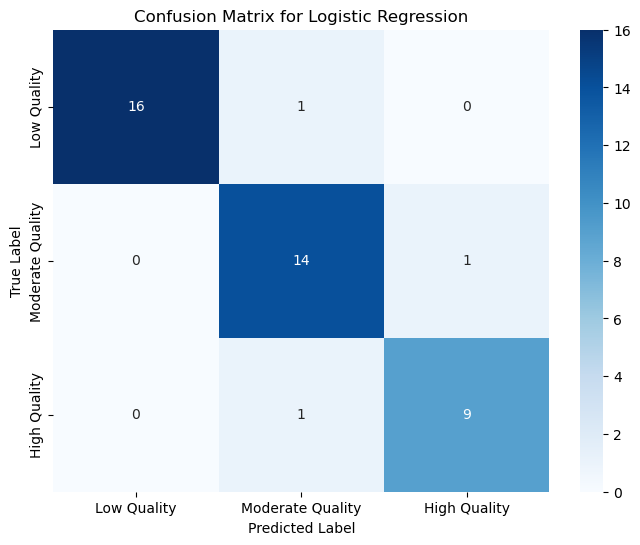

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on test data
y_pred = model.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Quality', 'Moderate Quality', 'High Quality'], yticklabels=['Low Quality', 'Moderate Quality', 'High Quality'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


### Probability Distributions for Each Class


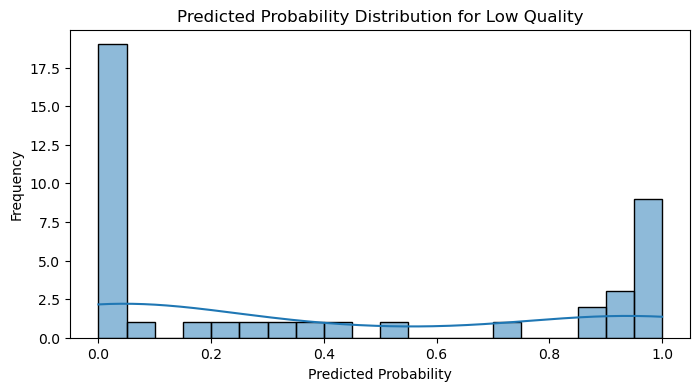

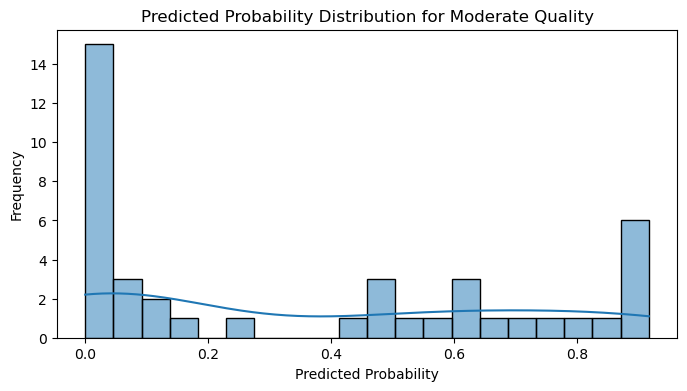

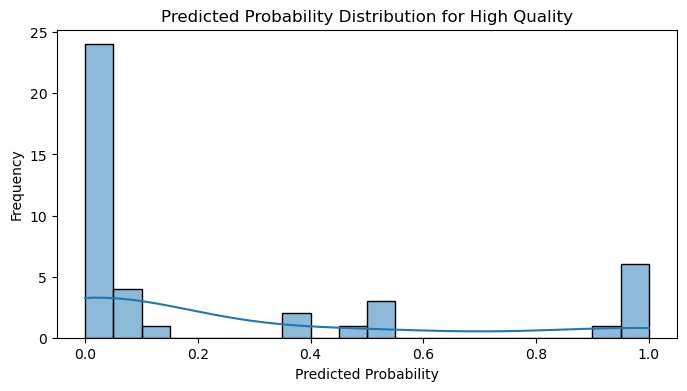

In [39]:
# Get probabilities for each class
y_proba = model.predict_proba(X_test)

# Plotting distributions of probabilities for each class
for i, label in enumerate(['Low Quality', 'Moderate Quality', 'High Quality']):
    plt.figure(figsize=(8, 4))
    sns.histplot(y_proba[:, i], bins=20, kde=True)
    plt.title(f"Predicted Probability Distribution for {label}")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")
    plt.show()


### 3. Feature Coefficients Plot


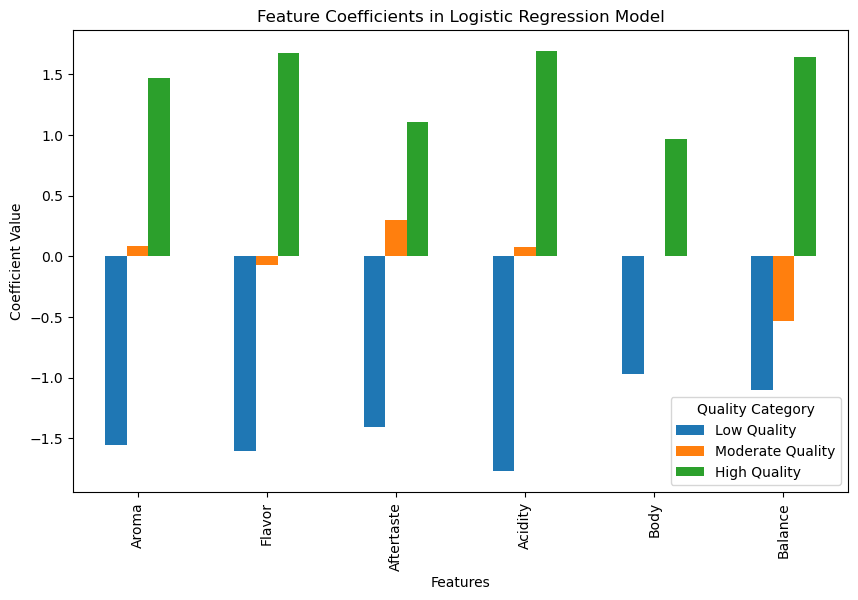

In [40]:
# Extract the coefficients
coefficients = pd.DataFrame(model.coef_, columns=['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance'], index=['Low Quality', 'Moderate Quality', 'High Quality']).T

# Plot coefficients
coefficients.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Coefficients in Logistic Regression Model")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend(title="Quality Category")
plt.show()


### 4. 2D Projection for Feature Pairs

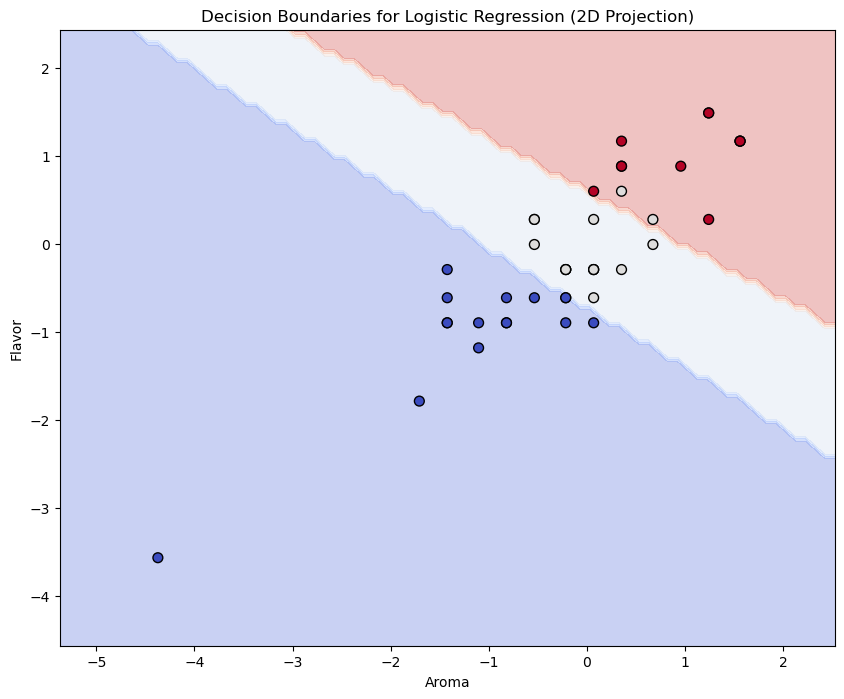

In [41]:
import numpy as np

# Select two features for simplicity (e.g., Aroma and Flavor)
X_train_2D = X_train[:, [0, 1]]  # Adjust indices based on selected features
X_test_2D = X_test[:, [0, 1]]

# Fit a logistic regression model with two features
model_2D = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_2D.fit(X_train_2D, y_train)

# Create a mesh to plot decision boundaries
x_min, x_max = X_test_2D[:, 0].min() - 1, X_test_2D[:, 0].max() + 1
y_min, y_max = X_test_2D[:, 1].min() - 1, X_test_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel("Aroma")
plt.ylabel("Flavor")
plt.title("Decision Boundaries for Logistic Regression (2D Projection)")
plt.show()
